## India Rainfall

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scale = StandardScaler()
LE = LabelEncoder()
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv("Sub_Division_IMD_2017.csv")

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [5]:
data.shape

(4188, 19)

In [6]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [7]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [8]:
data.isnull().sum().sum()

134

In [9]:
data.fillna(data.mean(numeric_only=True), inplace=True)
print(data.mean(numeric_only=True))

YEAR      1959.220630
JAN         18.938337
FEB         21.599427
MAR         27.412912
APR         43.071845
MAY         85.660860
JUN        230.117475
JUL        347.020043
AUG        289.742185
SEP        197.316332
OCT         95.324707
NOV         39.496433
DEC         18.968645
ANNUAL    1409.449207
JF          40.522979
MAM        155.820914
JJAS      1063.851580
OND        153.648623
dtype: float64


In [10]:
print('Null values = ', data.isnull().sum().sum())
data.describe()

Null values =  0


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.776982,35.718931,46.894327,68.118424,122.651174,234.152152,268.625870,188.336044,135.450491,99.111897,68.268852,43.002315,899.792622,59.251404,200.982272,705.821659,166.603928
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.675000,70.875000,175.900000,155.975000,100.400000,14.600000,0.600000,0.100000,805.275000,4.000000,24.175000,574.375000,34.175000
50%,1959.000000,6.000000,6.500000,7.900000,15.500000,36.900000,139.000000,285.250000,258.900000,173.900000,65.750000,9.450000,3.100000,1124.150000,19.000000,75.150000,881.500000,98.350000
75%,1988.000000,22.000000,26.600000,31.300000,49.525000,97.725000,304.300000,418.400000,377.525000,265.825000,148.100000,45.000000,17.700000,1634.075000,50.100000,196.900000,1284.525000,211.350000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


<Axes: >

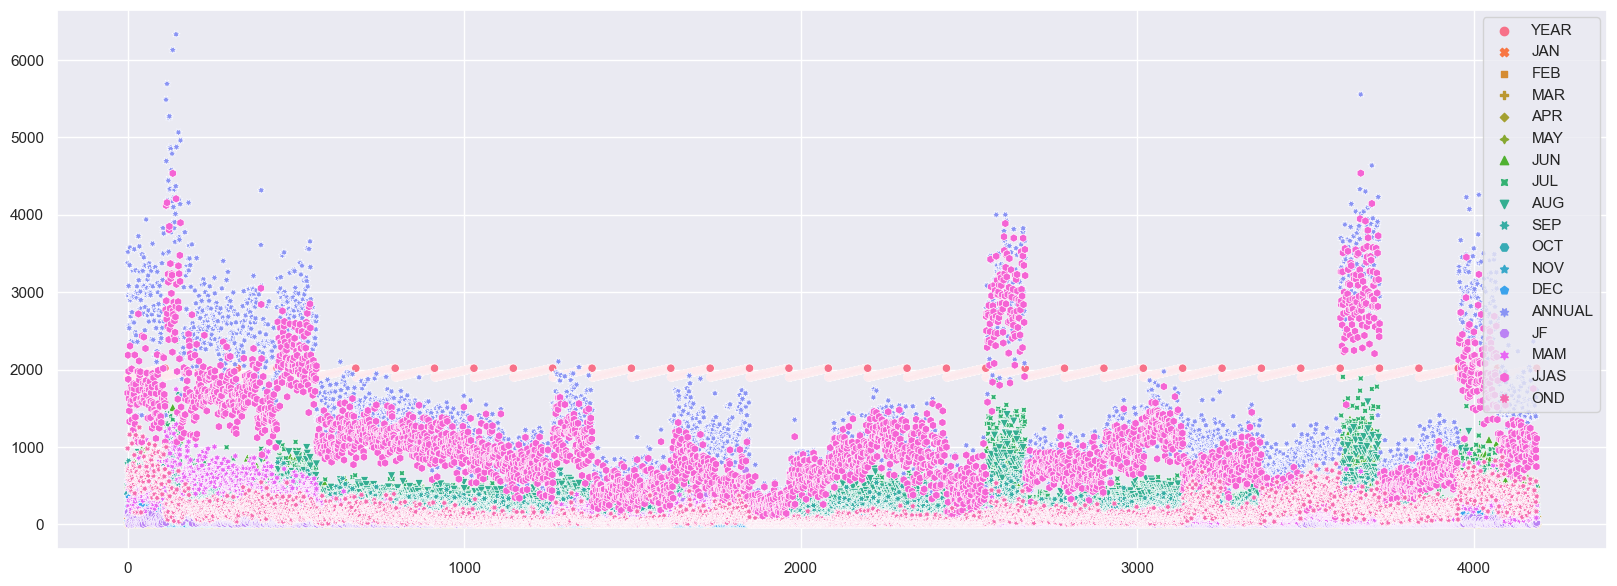

In [11]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data)

In [12]:
data.SUBDIVISION.value_counts()

West Madhya Pradesh                   117
East Rajasthan                        117
Coastal Karnataka                     117
Tamil Nadu                            117
Rayalseema                            117
Telangana                             117
Coastal Andhra Pradesh                117
Chhattisgarh                          117
Vidarbha                              117
Matathwada                            117
Madhya Maharashtra                    117
Konkan & Goa                          117
Saurashtra & Kutch                    117
Gujarat Region                        117
East Madhya Pradesh                   117
Kerala                                117
West Rajasthan                        117
South Interior Karnataka              117
Jammu & Kashmir                       117
Himachal Pradesh                      117
Punjab                                117
Haryana Delhi & Chandigarh            117
Uttarakhand                           117
West Uttar Pradesh                

In [13]:
data['SUBDIVISION'] = LE.fit_transform(data['SUBDIVISION'])
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [14]:
Month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
Monsoon = ['JF', 'MAM', 'JJAS', 'OND']

#  Regression

In [15]:
df1 = data.drop(Month, axis=1)
df1.head()

,SUBDIVISION,YEAR,ANNUAL,JF,MAM,JJAS,OND
0,0,1901,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,2566.7,1.3,309.7,1624.9,630.8


In [16]:
X = df1.drop('ANNUAL', axis=1)
y= df1['ANNUAL']

In [17]:
X.head()

,SUBDIVISION,YEAR,JF,MAM,JJAS,OND
0,0,1901,136.3,560.3,1696.3,980.3
1,0,1902,159.8,458.3,2185.9,716.7
2,0,1903,156.7,236.1,1874.0,690.6
3,0,1904,24.1,506.9,1977.6,571.0
4,0,1905,1.3,309.7,1624.9,630.8


In [18]:
y.head()

0    3373.2
1    3520.7
2    2957.4
3    3079.6
4    2566.7
Name: ANNUAL, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Support Vector Regression
from sklearn.svm import SVR

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# Ada Boosting Regression
from sklearn.ensemble import AdaBoostRegressor

# K-Nearest Neighbors Regression (KNN)
from sklearn.neighbors import KNeighborsRegressor

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rdg = Ridge()
rdg.fit(X_train,y_train)

lso = Lasso()
lso.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = rdg.predict(X_test)
y_pred3 = lso.predict(X_test)
y_pred4 = svm.predict(X_test)
y_pred5 = dtr.predict(X_test)
y_pred6 = rfr.predict(X_test)
y_pred7 = gbr.predict(X_test)
y_pred8 = abr.predict(X_test)
y_pred9 = knn.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
all_predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9]
for i, predictions in enumerate(all_predictions, start=1):
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for Model {i}: {mse}')

Mean Squared Error for Model 1: 9908.548331970502
Mean Squared Error for Model 2: 9908.54837987654
Mean Squared Error for Model 3: 9908.721168985503
Mean Squared Error for Model 4: 564291.5778122428
Mean Squared Error for Model 5: 47569.184993817275
Mean Squared Error for Model 6: 17215.201153819482
Mean Squared Error for Model 7: 14663.091859824037
Mean Squared Error for Model 8: 65044.33356640772
Mean Squared Error for Model 9: 21650.699377852143


In [24]:
from sklearn.metrics import r2_score
all_predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9]
for i, predictions in enumerate(all_predictions, start=1):
    r2 = r2_score(y_test, predictions)
    print(f'R2_Score for Model {i}: {r2}')

R2_Score for Model 1: 0.9896495766397799
R2_Score for Model 2: 0.9896495765897375
R2_Score for Model 3: 0.9896493960950404
R2_Score for Model 4: 0.41054365046410934
R2_Score for Model 5: 0.9503094512848059
R2_Score for Model 6: 0.9820170811905456
R2_Score for Model 7: 0.9846830026524387
R2_Score for Model 8: 0.9320549926144625
R2_Score for Model 9: 0.9773837804391012


In [25]:
# New dataframe to Compare the predicted values

df = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'ridge': y_pred2, 'lasso': y_pred3, 'svm': y_pred4 , 'dicision': y_pred5, 'r_forest': y_pred6, 'g_boost': y_pred7, 'a_boost': y_pred8, 'knn': y_pred9 })
df

,Actual,Lr,ridge,lasso,svm,dicision,r_forest,g_boost,a_boost,knn
1743,936.7,922.825606,922.825598,922.852091,942.925056,889.9,962.818000,1006.004928,1075.329630,931.680000
3814,643.0,649.179936,649.179936,649.147754,913.913949,662.3,664.291000,617.720956,668.226418,664.620000
1515,339.6,343.311475,343.311479,343.352290,863.047787,435.3,386.402000,421.494817,657.322687,297.460000
96,2620.2,2604.471789,2604.471801,2604.577931,1562.423987,2600.6,2644.842000,2717.773189,2674.828982,2670.480000
4073,2158.8,2139.998091,2139.998078,2139.965332,1358.223956,2068.8,1975.083905,1888.200387,1869.506607,1612.889524
...,...,...,...,...,...,...,...,...,...,...
2367,478.3,480.204705,480.204722,480.353335,914.393886,479.2,482.233000,475.155453,657.322687,483.040000
332,2527.6,2510.984238,2510.984231,2510.949833,1567.026273,2529.2,2540.278000,2585.609486,2674.828982,2511.120000
2936,1158.0,1160.431135,1160.431124,1160.318884,1209.740048,1216.2,1172.004000,1200.366789,1399.151870,1154.180000
960,1299.2,1292.104208,1292.104227,1292.295914,1228.886493,1364.3,1318.745000,1276.587090,1399.703641,1275.200000


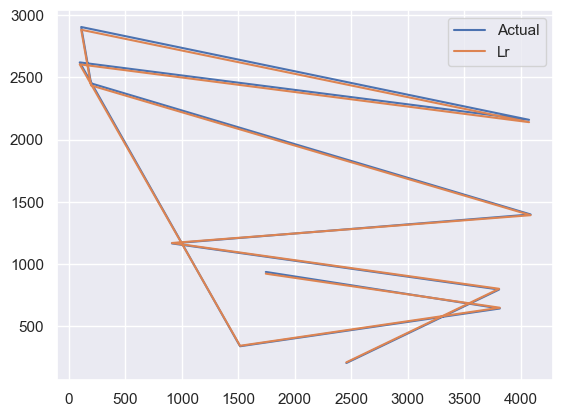

In [26]:
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['Lr'].iloc[0:11],label='Lr')
plt.legend()

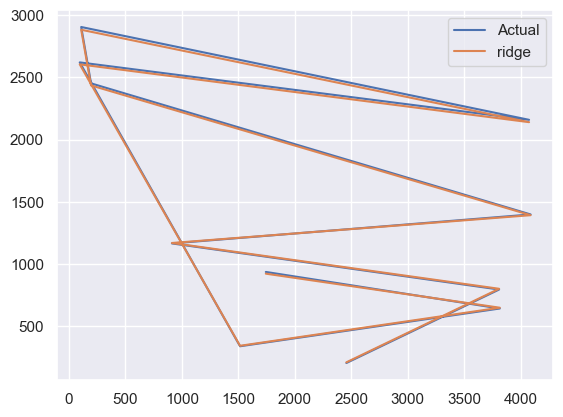

In [27]:
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['ridge'].iloc[0:11],label='ridge')
plt.legend()

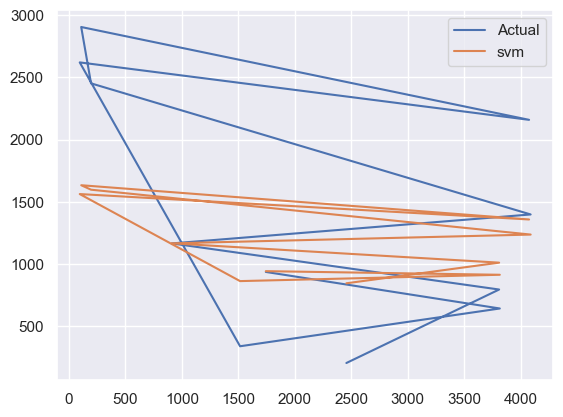

In [28]:
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['svm'].iloc[0:11],label='svm')
plt.legend()

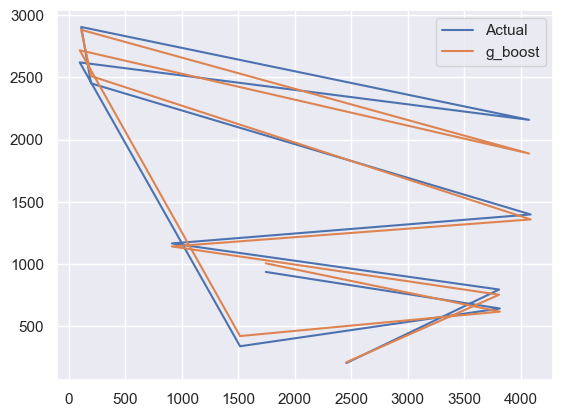

In [29]:
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['g_boost'].iloc[0:11],label='g_boost')
plt.legend()

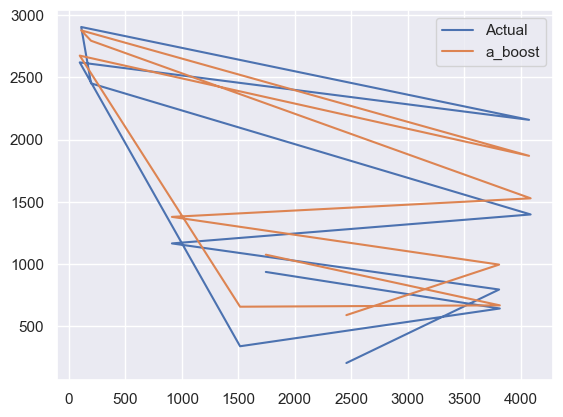

In [30]:
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['a_boost'].iloc[0:11],label='a_boost')
plt.legend()

#  Classification

In [31]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


<Axes: xlabel='SUBDIVISION', ylabel='YEAR'>

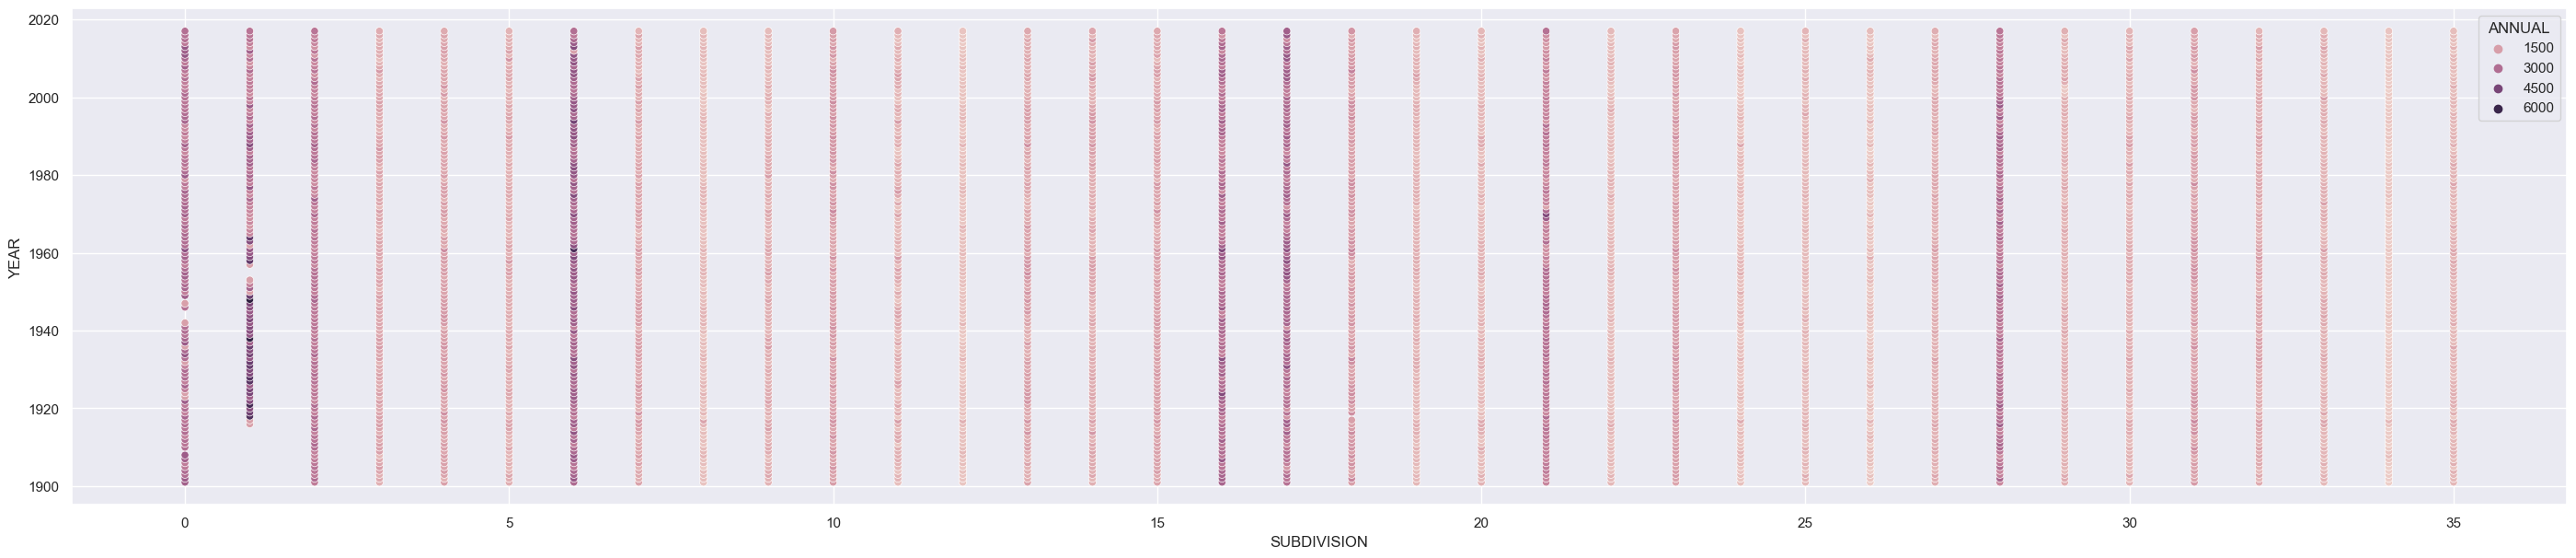

In [32]:
plt.figure(figsize=(35,7))
sns.scatterplot(x=data['SUBDIVISION'], y=data['YEAR'], hue=data['ANNUAL'])

In [33]:
df2 = data.drop(Monsoon, axis=1)
df2 = df2.drop('ANNUAL', axis =1)
df2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [34]:
df2.shape

(4188, 14)

In [35]:
df2 = df2[df2['SUBDIVISION'].isin([6, 12])]
df2.shape

(234, 14)

In [36]:
df2['YEAR'] = LE.fit_transform(df2.YEAR)
df2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1381,12,0,35.4,28.9,11.1,0.0,5.1,13.2,126.4,151.5,10.5,2.0,0.0,6.1
1382,12,1,0.0,0.7,2.9,10.2,15.8,74.6,149.3,97.1,59.8,9.3,0.0,0.0
1383,12,2,14.7,0.5,2.3,0.5,8.5,8.6,151.6,138.2,97.7,4.0,0.0,2.3
1384,12,3,7.6,0.7,48.0,0.5,29.3,34.3,109.7,162.9,102.3,1.5,10.4,20.3
1385,12,4,44.8,20.8,14.0,1.3,7.4,20.1,93.6,23.1,92.6,0.0,0.0,5.1


In [37]:
df2['SUBDIVISION'] = LE.fit_transform(df2.SUBDIVISION)
df2.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1381,1,0,35.4,28.9,11.1,0.0,5.1,13.2,126.4,151.5,10.5,2.0,0.0,6.1
1382,1,1,0.0,0.7,2.9,10.2,15.8,74.6,149.3,97.1,59.8,9.3,0.0,0.0
1383,1,2,14.7,0.5,2.3,0.5,8.5,8.6,151.6,138.2,97.7,4.0,0.0,2.3
1384,1,3,7.6,0.7,48.0,0.5,29.3,34.3,109.7,162.9,102.3,1.5,10.4,20.3
1385,1,4,44.8,20.8,14.0,1.3,7.4,20.1,93.6,23.1,92.6,0.0,0.0,5.1


In [38]:
X = df2.drop('SUBDIVISION', axis=1)
y= df2['SUBDIVISION']

In [39]:
X = scale.fit_transform(X)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Machine Learning Classification Models 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

Model training and pridiction

In [42]:
# Logistic Regression
lgr = LogisticRegression(max_iter=1000, solver='saga')
lgr.fit(X_train, y_train)

# Support Vector Machines (SVM)
svc = SVC(kernel='poly', random_state=5)
svc.fit(X_train, y_train)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None,
    min_samples_split=3,)
dtc.fit(X_train, y_train)

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, min_samples_split=4)
rfc.fit(X_train, y_train)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.1)
gbc.fit(X_train, y_train)

# Ada Boosting Classifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

# K-Nearest Neighbors (KNN) Classifier
knn_c = KNeighborsClassifier()
knn_c.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred1 = lgr.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = dtc.predict(X_test)
y_pred4 = rfc.predict(X_test)
y_pred5 = gbc.predict(X_test)
y_pred6 = abc.predict(X_test)
y_pred7 = knn_c.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
all_predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7]
for i, predictions in enumerate(all_predictions, start=1):
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy score for Model {i}: {accuracy}')

Accuracy score for Model 1: 1.0
Accuracy score for Model 2: 1.0
Accuracy score for Model 3: 1.0
Accuracy score for Model 4: 1.0
Accuracy score for Model 5: 1.0
Accuracy score for Model 6: 1.0
Accuracy score for Model 7: 0.9787234042553191


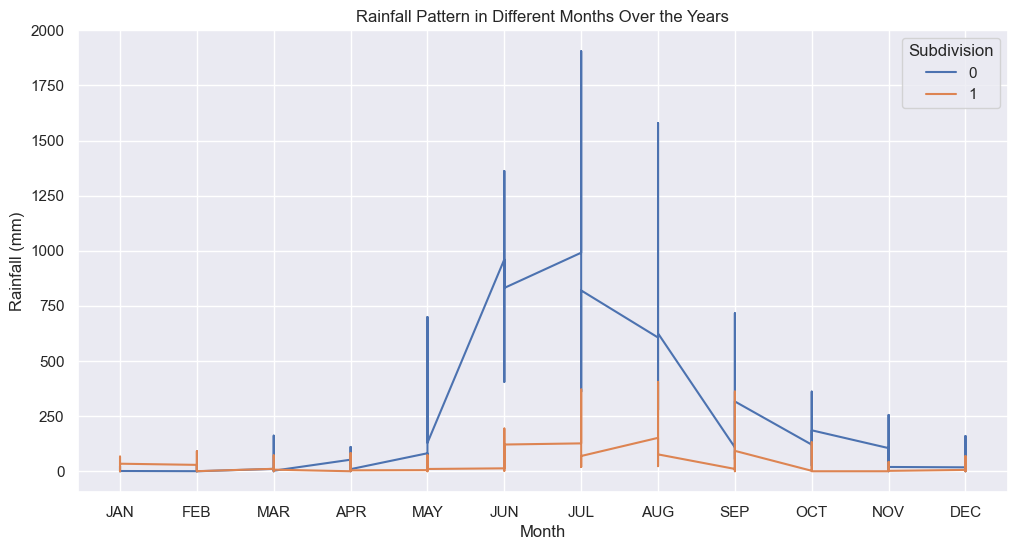

In [45]:
# Melt the DataFrame to make it suitable for plotting
melted_df = pd.melt(df2, id_vars=['SUBDIVISION', 'YEAR'], var_name='MONTH', value_name='RAINFALL')

# Convert MONTH column to categorical to ensure correct ordering
months_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
melted_df['MONTH'] = pd.Categorical(melted_df['MONTH'], categories=months_order, ordered=True)

# Plotting
plt.figure(figsize=(12, 6))
for subdivision, subset in melted_df.groupby('SUBDIVISION'):
    plt.plot(subset['MONTH'], subset['RAINFALL'], label=subdivision)

plt.title('Rainfall Pattern in Different Months Over the Years')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Subdivision')
plt.show()

# Clustering

In [46]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [47]:
data.shape

(4188, 19)

In [48]:
df3 = data.drop(Monsoon, axis=1)
df3 = df3.drop(Month, axis=1)
df3.head()

,SUBDIVISION,YEAR,ANNUAL
0,0,1901,3373.2
1,0,1902,3520.7
2,0,1903,2957.4
3,0,1904,3079.6
4,0,1905,2566.7


In [49]:
df3.shape

(4188, 3)

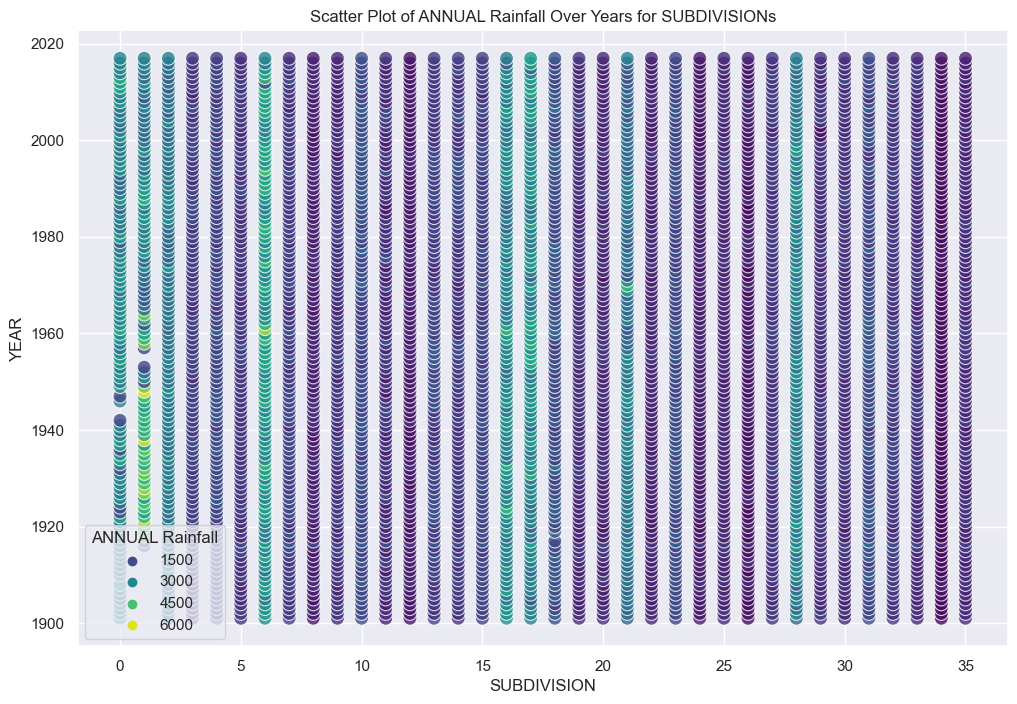

In [50]:
color_palette = sns.color_palette("viridis", as_cmap=True)

# Scatter plot with enhanced features
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=df3['SUBDIVISION'], y=df3['YEAR'], hue=df3['ANNUAL'], palette=color_palette, marker='o', s=100, edgecolor='w', alpha=0.8)

# Improve plot aesthetics
plt.title('Scatter Plot of ANNUAL Rainfall Over Years for SUBDIVISIONs')
plt.xlabel('SUBDIVISION')
plt.ylabel('YEAR')

# Add legend with appropriate title
scatter.legend(title='ANNUAL Rainfall')

# Show the plot
plt.show()

In [51]:
df3 = df3[df3['SUBDIVISION'] == 1]
df3.shape

(99, 3)

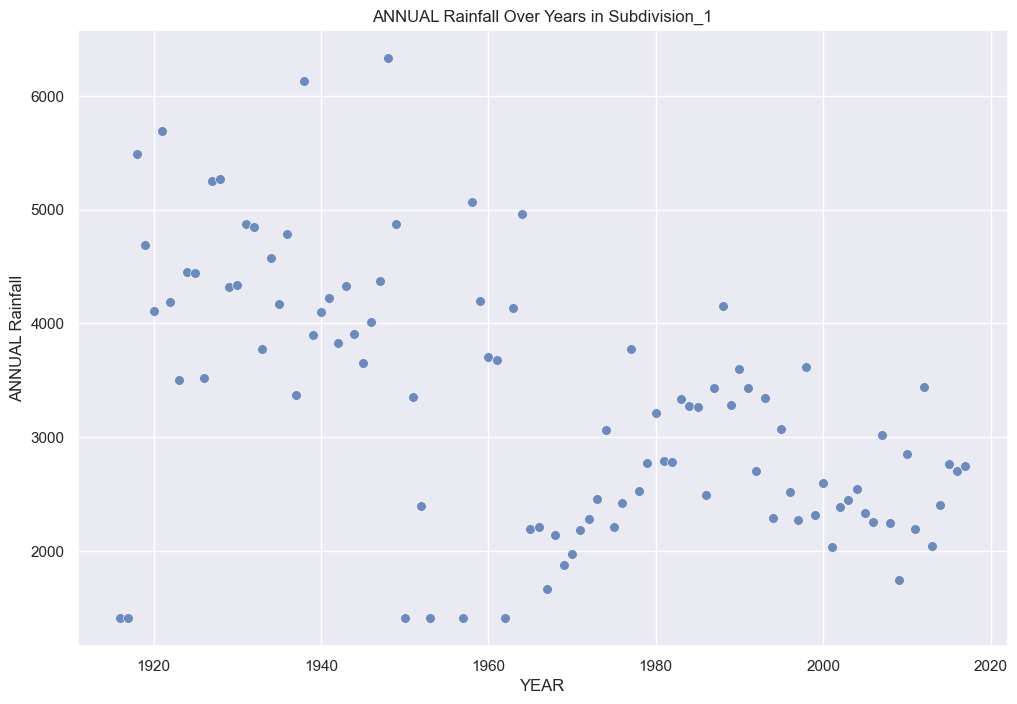

In [52]:
# Scatter plot for ANNUAL rainfall over years in the subdivision_1
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=df3['YEAR'], y=df3['ANNUAL'], marker='o', s=50, edgecolor='w', alpha=0.8)
plt.title(f'ANNUAL Rainfall Over Years in Subdivision_1')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL Rainfall')
plt.show()

In [53]:
df3 = df3.drop('SUBDIVISION', axis=1)

In [54]:
df3.head()

,YEAR,ANNUAL
112,1916,1409.449207
113,1917,1409.449207
114,1918,5486.300000
115,1919,4693.900000
116,1920,4106.700000


In [55]:
df3.shape

(99, 2)

In [56]:
X = scale.fit_transform(df3)
X

array([[-1.70536733e+00, -1.64705823e+00],
       [-1.67182912e+00, -1.64705823e+00],
       [-1.63829091e+00,  1.93679167e+00],
       [-1.60475269e+00,  1.24021414e+00],
       [-1.57121448e+00,  7.24022414e-01],
       [-1.53767627e+00,  2.11708957e+00],
       [-1.50413805e+00,  7.94787799e-01],
       [-1.47059984e+00,  1.97281807e-01],
       [-1.43706163e+00,  1.02624775e+00],
       [-1.40352341e+00,  1.01684167e+00],
       [-1.36998520e+00,  2.09676738e-01],
       [-1.33644699e+00,  1.73187973e+00],
       [-1.30290877e+00,  1.74902166e+00],
       [-1.26937056e+00,  9.11704522e-01],
       [-1.23583235e+00,  9.23923638e-01],
       [-1.20229413e+00,  1.39686497e+00],
       [-1.16875592e+00,  1.37822862e+00],
       [-1.13521771e+00,  4.30939439e-01],
       [-1.10167949e+00,  1.13630770e+00],
       [-1.06814128e+00,  7.82920312e-01],
       [-1.03460307e+00,  1.32372609e+00],
       [-1.00106485e+00,  8.08925273e-02],
       [-9.67526641e-01,  2.50177196e+00],
       [-9.

In [57]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\PANDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PANDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PANDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PANDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

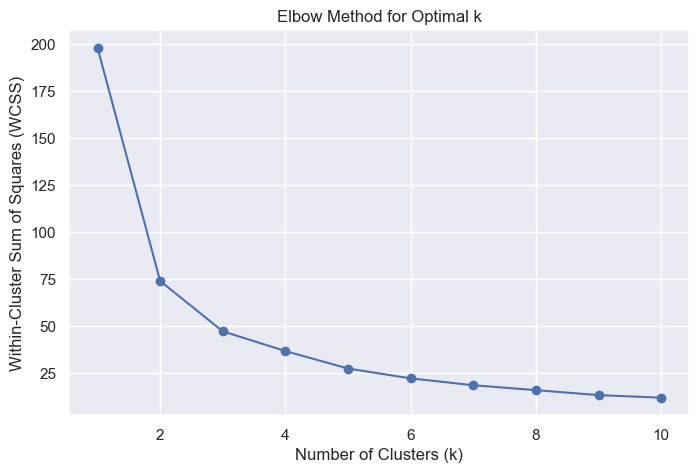

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=2, random_state=42)
C_1 = kmeans.fit_predict(X)
C_1

C:\Users\PANDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PANDEY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

DB-SCAN Clustering

In [61]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
C_2 = dbscan.fit_predict(X)
C_2

array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        1,  0,  1,  1,  1, -1,  0,  0,  0,  1,  0, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

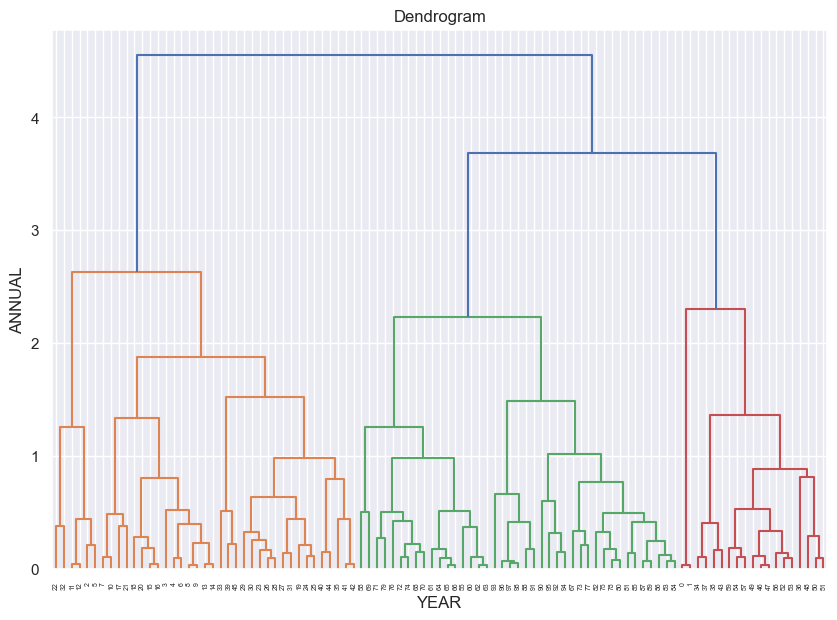

In [62]:
plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method = "complete"))
plt.title('Dendrogram')
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.show()

In [63]:
agglomerative = AgglomerativeClustering(n_clusters=3)
C_3 = agglomerative.fit_predict(X)
C_3

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

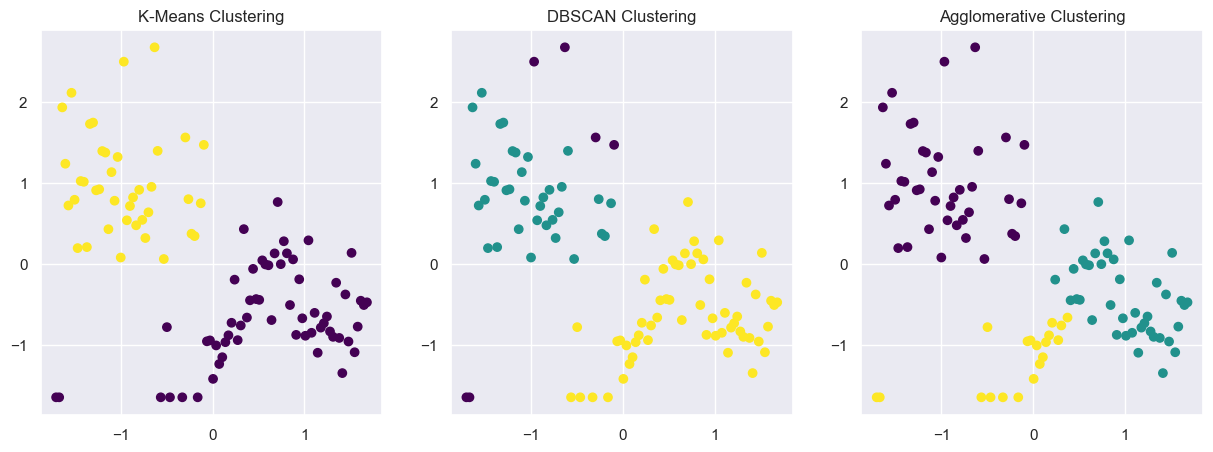

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# K-Means
axs[0].scatter(X[:, 0], X[:, 1], c=C_1, cmap='viridis')
axs[0].set_title('K-Means Clustering')

# DBSCAN
axs[1].scatter(X[:, 0], X[:, 1], c=C_2, cmap='viridis')
axs[1].set_title('DBSCAN Clustering')

# Agglomerative
axs[2].scatter(X[:, 0], X[:, 1], c=C_3, cmap='viridis')
axs[2].set_title('Agglomerative Clustering')

plt.show()